In [39]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import date

In [40]:
f = open("chats/chat.txt", "r", encoding='utf-8')
data = f.read()
data = data.replace('- antoni:', '- Anton:')
data = data.replace('- Sergowo Asterisco:', '- Sergio:')
data = data.replace('- Sergio Acróbata:', '- Sergio:')
data = data.replace('- Miden:', '- Miranda:')
data = data.replace('- Netherlands:', '- Miranda:')
data = data.replace('- Diego Smash:', '- Diego:')
data = data.replace('- Paula Arcas:', '- Paula:')
data = data.replace('- Laura Toro Diosdado:', '- Laura:')
data = data.replace('- Jaoquien:', '- Joaquín:')
data = data.replace('- Joaquin:', '- Joaquín:')
data = data.replace('- aitor:', '- Aitor:')

In [41]:
messages = re.findall('(\d+/\d+/\d+, \d+:\d+\d+) - (.*?): (gp$|Gp$|GP$)', data, re.MULTILINE)

In [42]:
#(\r\n|\r|\n)

In [43]:
df = pd.DataFrame(messages,columns=['Time', 'Name', 'Message'])

In [44]:
df['Time'] = pd.to_datetime(df.Time, format='%d/%m/%y, %H:%M')
#df = df.set_index('Time')

## Total GPEOS
Cantidad total de gpeos en el chat.

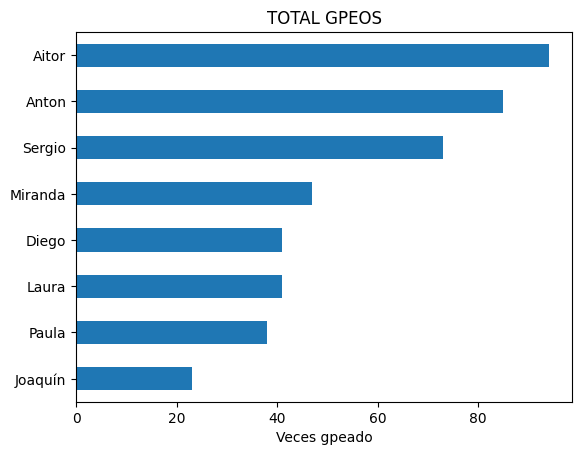

In [45]:
ax = df.Name.value_counts().plot.barh(title='TOTAL GPEOS', layout='constrained')
ax.set_xlabel("Veces gpeado")
ax.invert_yaxis()

fig = ax.get_figure()
fig.savefig("./plots/gps_total.png", bbox_inches='tight', dpi=300)

#df.Name.value_counts()

# MES ACTUAL

In [46]:
mask = (df['Time'] > '2022-12-01') & (df['Time'] <= '2023-01-01')
df_month = df.loc[mask]

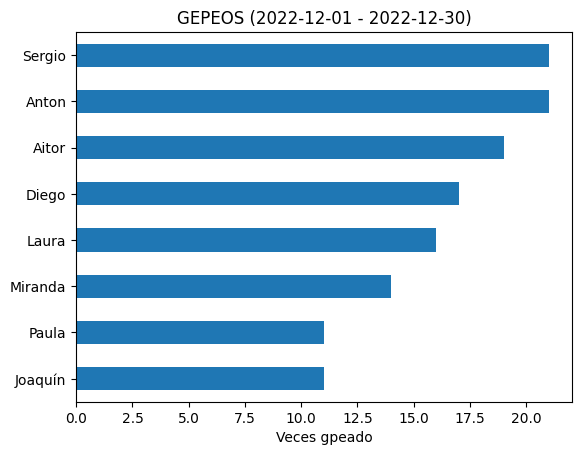

In [47]:
title_p = 'GEPEOS (2022-12-01 - ' + str(date.today()) + ')'

ax = df_month.Name.value_counts().plot.barh(title=title_p)
ax.set_xlabel("Veces gpeado")
ax.invert_yaxis()

fig = ax.get_figure()
fig.savefig("./plots/gps_este_mes.png", bbox_inches='tight', dpi=300)

#df_month.Name.value_counts()

In [48]:
df_month = df.drop('Message', axis=1)


In [49]:
df_month['new_date'] = [d.date() for d in df_month['Time']]
df_month['new_time'] = [d.time() for d in df_month['Time']]

In [50]:
df_month = df_month.pivot_table(
    values='new_time',
    index='new_date',
    columns='Name',
    aggfunc='first'
) 

In [51]:
df_month

Name,Aitor,Anton,Diego,Joaquín,Laura,Miranda,Paula,Sergio
new_date,,,,,,,,
2022-05-02,NaN,11:47:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,NaN,09:04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,NaN,09:12:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-06,NaN,10:25:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-18,12:00:00,12:21:00,12:00:00,13:05:00,13:04:00,14:48:00,NaN,12:00:00
2022-12-19,NaN,08:04:00,NaN,08:01:00,NaN,08:00:00,08:02:00,08:12:00
2022-12-21,08:11:00,08:00:00,09:45:00,NaN,09:02:00,09:07:00,10:03:00,09:59:00


In [52]:
df_month.to_csv('out.csv')